In [27]:
cd /home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/

/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# load the trajectory from ../Data
trr_file = '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/adp.trr'
gro_file = '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/adp.gro'
traj = md.load(trr_file, top=gro_file)

Plot saved to PDF successfully.


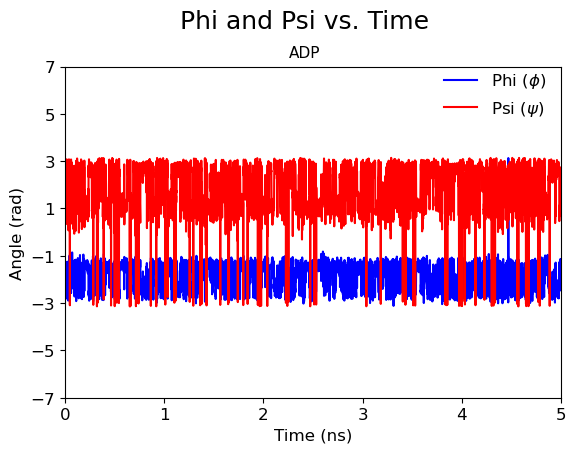

In [29]:
# compute phi and psi angles
phi = md.compute_phi(traj, periodic=True)
psi = md.compute_psi(traj, periodic=True)
# figure 1: phi & psi over time
fig=plt.figure(1)
# plot phi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, phi[1][:,0], color='blue')
# plot psi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, psi[1][:,0], color='red')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)', fontsize=12)
plt.ylabel('Angle (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="Phi and Psi vs. Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set the legend, fontsize = 12, location = upper right, frameon = False, shift the legend box up
plt.legend(['Phi ($\phi$)', 'Psi ($\psi$)'], fontsize=12, loc='upper right', frameon=False, bbox_to_anchor=(1.0, 1.03))
# set limits for the axes
plt.xlim(0,5)
plt.ylim(-7,7)
plt.yticks(np.arange(-7,7.1,2))
# save figure as pdf in ../Figures
directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Figures/"
fname = "Week5Fig.1-Phi and Psi.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

/state/partition1/job-44474944/ipykernel_1336997/2423947890.py:5: RuntimeWarning: divide by zero encountered in log
  F = -np.log(H)


stable state 1 : [-2.45044227] [2.82743339]
free energy: 0.05
stable state 2 : [-1.44513262] [1.0681415]
free energy: 0.00
Plot saved to PDF successfully.


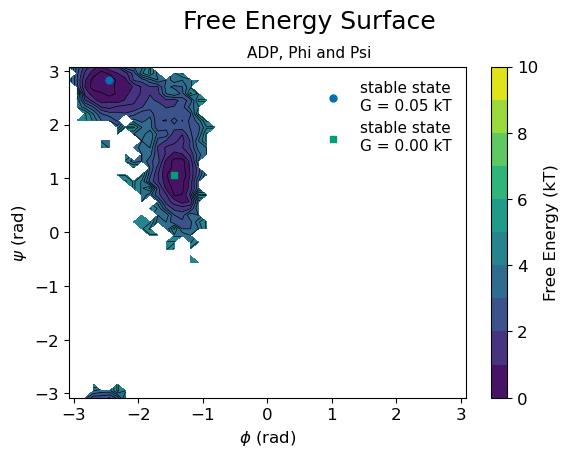

In [30]:
fig=plt.figure(2)

# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]], density=True)
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10    

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free Energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="Free Energy Surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, Phi and Psi", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 1, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT', )
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Figures/"
fname = "Week5Fig.2-Free Energy Surface of Phi and Psi.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

/state/partition1/job-44474944/ipykernel_1336997/2831065869.py:11: RuntimeWarning: divide by zero encountered in log
  F = -np.log(H)


stable state 1 : [-2.45044227] [2.82743339]
free energy: 0.00
stable state 2 : [-1.44513262] [1.19380521]
free energy: 0.05
stable state 3 : [1.0681415] [-0.81681409]
free energy: 1.53
Plot saved to PDF successfully.


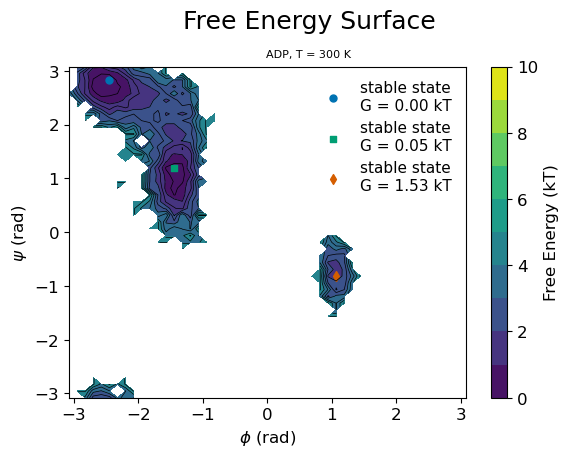

In [31]:
import mdtraj as md

trr_file = '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/T300/adp_exchange3temps.trr'
gro_file = '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/T300/adp_exchange3temps.gro'
traj = md.load(trr_file, top=gro_file)
# compute phi and psi
phi = md.compute_phi(traj)
psi = md.compute_psi(traj)
# compute free energy and normalize
H, xedges, yedges = np.histogram2d(phi[1][:,0], psi[1][:,0], bins=50, range=[[-np.pi, np.pi], [-np.pi, np.pi]],density=True)
F = -np.log(H)
F -= F.min()
# set min and max of free energy
Fmin, Fmax = 0, 10

# figure 3: free energy surface-T300K
fig=plt.figure(3)

# free energy surface & contour lines
# set the contour levels
levels = np.linspace(Fmin, Fmax, 11)
# compute the midpoints of the bins
x = 0.5*(xedges[1:] + xedges[:-1])
y = 0.5*(yedges[1:] + yedges[:-1])
# plot the free energy, colorblind-friendly
plt.contourf(x, y, F.T, levels=levels)
# colorbar, 0 to 8, fontsize = 12, only show ticks at 0, 2, 4, 6, 8, 10
cbar = plt.colorbar(ticks=[0, 2, 4, 6, 8, 10])
cbar.ax.tick_params(labelsize=12)
# add labels to the colorbar, fontsize = 12
cbar.set_label('Free Energy (kT)', fontsize=12)
# plot the contour lines, colorblind-friendly
plt.contour(x, y, F.T, levels=10, colors='k', linewidths=0.5)

# labels & title
# labels, fontsize = 12
plt.xlabel('$\phi$ (rad)', fontsize=12)
plt.ylabel('$\psi$ (rad)', fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="Free Energy Surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300 K", fontsize=8, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# this part can be commented out (need further debugging)
# stable states finding (semi-manual)
# parameters (setting after seeing the plot)
N_stable = 3
# area = [psi_min, psi_max, phi_min, phi_max] = [y,y,x,x]
area=[[-np.pi, np.pi, -np.pi, -np.pi/2], [-np.pi, np.pi, -np.pi/2, 0], [-np.pi, np.pi, 0, np.pi]]
# blind-friendly colors & shapes
colors = ['#0072B2', '#009E73', '#D55E00']
shapes = ['o', 's', 'd']
# find the stable states
for i in range(0,3):
    xidx = np.where((x>area[i][2]) & (x<area[i][3]))
    yidx = np.where((y>area[i][0]) & (y<area[i][1]))
    # find the minimum value in the area of interest
    idx = np.argpartition(F[xidx[0], :][:, yidx[0]].flatten(), 1)[:1]
    # convert the indices to x and y indices
    px1, px2 = np.unravel_index(idx, F[xidx[0], :][:, yidx[0]].shape)
    # check if px1,px1 is the stable state
    if (F[xidx[0][px1], yidx[0][px2]] < Fmin+4): # if the free energy is less than 4, it is a stable state
        # if yes, print the coordinates of the stable state and the free energy
        print("stable state", 1+i, ":", x[xidx[0][px1]], y[yidx[0][px2]])
        # format the F value to 2 decimal places
        Fval = "{:.2f}".format(round(float(F[xidx[0][px1], yidx[0][px2]]), 2))
        print("free energy:", Fval)
        # plot the stable state, colorblind-friendly, scatter plot
        plt.scatter(x[xidx[0][px1]], y[yidx[0][px2]], color=colors[i], marker=shapes[i], s=25, label='stable state\nG = '+Fval+' kT')
        # right top corner legend, fontsize = 11
        plt.legend(loc='upper right', fontsize=11, frameon=False)
    i+=1

directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Figures/"
fname = "Week5Fig.3-Free Energy Surface with Parallel Tempering (T=300K).pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

Plot saved to PDF successfully.


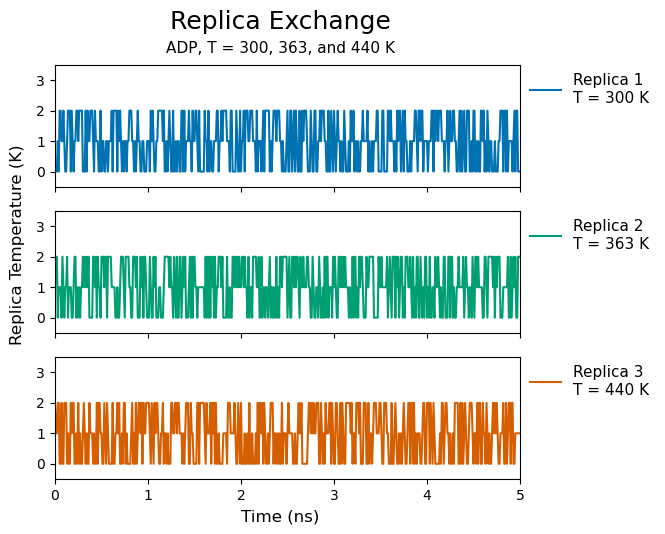

In [40]:
xvg_file = '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/replica_temp.xvg'
xvg = np.loadtxt(xvg_file, skiprows=0)
# scale the time to ns
xvg[:,0] = xvg[:,0]/1000
# figure 4: replica exchange
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,sharey=True,figsize=(6,6))

# plot replica exchange
# plot replica 1, every 100 row, in ns, label
ax1.plot(xvg[::100,0], xvg[::100,1], color='#0072B2', label='Replica 1\nT = 300 K')
# subplot legend, fontsize = 11, relocate to the right
ax1.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 2, every 100 row, in ns, colorblind-friendly, label
ax2.plot(xvg[::100,0], xvg[::100,2], color='#009E73', label='Replica 2\nT = 363 K')
# subplot legend, fontsize = 11, relocate to the right
ax2.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)
# plot replica 3, every 100 row, in ns, colorblind-friendly, label
ax3.plot(xvg[::100,0], xvg[::100,3], color='#D55E00', label='Replica 3\nT = 440 K')
# subplot legend, fontsize = 11, relocate to the right
ax3.legend(loc='center', bbox_to_anchor=(1.15, 0.8), fontsize=11, frameon=False)

# set limits for all subplots
plt.xlim(0, 5)
plt.ylim(-0.5, 3.5)
# set y ticks, fontsize = 12
plt.yticks(np.arange(0, 4, 1))

# labels & title
# y label
plt.text(x=0.05, y=0.5, s="Replica Temperature (K)", fontsize=12, va="center", rotation=90, transform=fig.transFigure)
# x label
plt.text(x=0.5, y=0.04, s="Time (ns)", fontsize=12, ha="center", transform=fig.transFigure)
# two lines of title
plt.text(x=0.5, y=0.86, s="Replica Exchange", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, T = 300, 363, and 440 K", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Figures/"
fname = "Week5Fig.4-Replica Exchange.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")

Plot saved to PDF successfully.


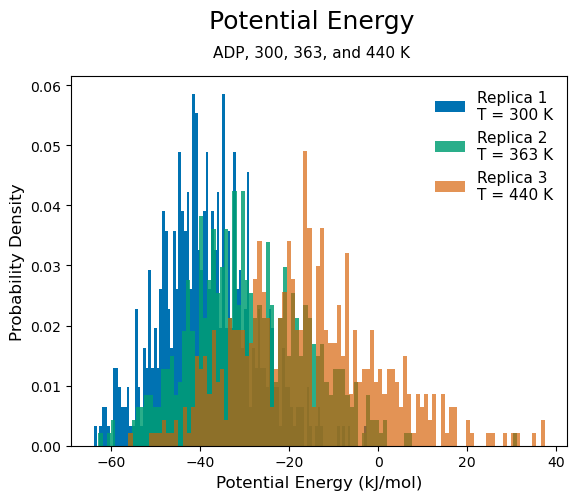

In [46]:
import numpy as np

xvgs = ('/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/T300/adp_exchange3temps.xvg',
        '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/T363/adp_exchange3temps.xvg', 
        '/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Inputs/T440/adp_exchange3temps.xvg')
# generate empty array for potential energy, length = len(xvgs)
PE = np.empty(len(xvgs), dtype=object)
# load potential energy  
for i in range(3):
    xvg = np.loadtxt(xvgs[i], skiprows=24)
    PE[i]= xvg[:,1]
    i += 1
# alpha pool
alphas = np.linspace(1, 0.5, 4)

# figure 5: potential energy histogram
fig = plt.figure(5)
# plot potential energy histogram
# plot replica 1, colorblind-friendly, label
plt.hist(PE[0], bins=100, color='#0072B2', label='Replica 1\nT = 300 K', alpha=alphas[0], density=True)
# plot replica 2, colorblind-friendly, label
plt.hist(PE[1], bins=100, color='#009E73', label='Replica 2\nT = 363 K', alpha=alphas[1], density=True)
# plot replica 3, colorblind-friendly, label
plt.hist(PE[2], bins=100, color='#D55E00', label='Replica 3\nT = 440 K', alpha=alphas[2], density=True)
# legend, fontsize = 11, relocate to the right
plt.legend(loc='upper right', fontsize=11, frameon=False)
#bbox_to_anchor=(1.15, 0.8)

# labels & title
plt.xlabel('Potential Energy (kJ/mol)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.text(x=0.5, y=0.98, s="Potential Energy", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s= "ADP, 300, 363, and 440 K", fontsize=11, ha="center", transform=fig.transFigure)

directory = "/home/mp6576/comp-class-2023/comp-lab-class-2023/Week5/Figures/"
fname = "Week5Fig.5-Potential Energy Histogram.pdf"
full_dir = directory + fname

try:
    plt.savefig(full_dir, bbox_inches='tight')  # Adjust bounding box to fit the plot
    print("Plot saved to PDF successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
    print("File not saved")